In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
image_path = r'C:\Users\Student\Desktop\167913 (1).jpg'

In [6]:
import matplotlib.pyplot as plt

def plotimage(img, title=None, figsize=None):
    h, w = img.shape[:2]  # Use img.shape[:2] to handle both grayscale and color images
    dpi = 80
    
    if figsize is None:
        figsize = (w / dpi, h / dpi)
    
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])
    ax.axis('off')
    
    if len(img.shape) == 2:  # Grayscale image
        ax.imshow(img, cmap='gray')
    else:  # Color image (assuming RGB)
        ax.imshow(img)
    
    if title:
        plt.title(title)
    
    plt.show()



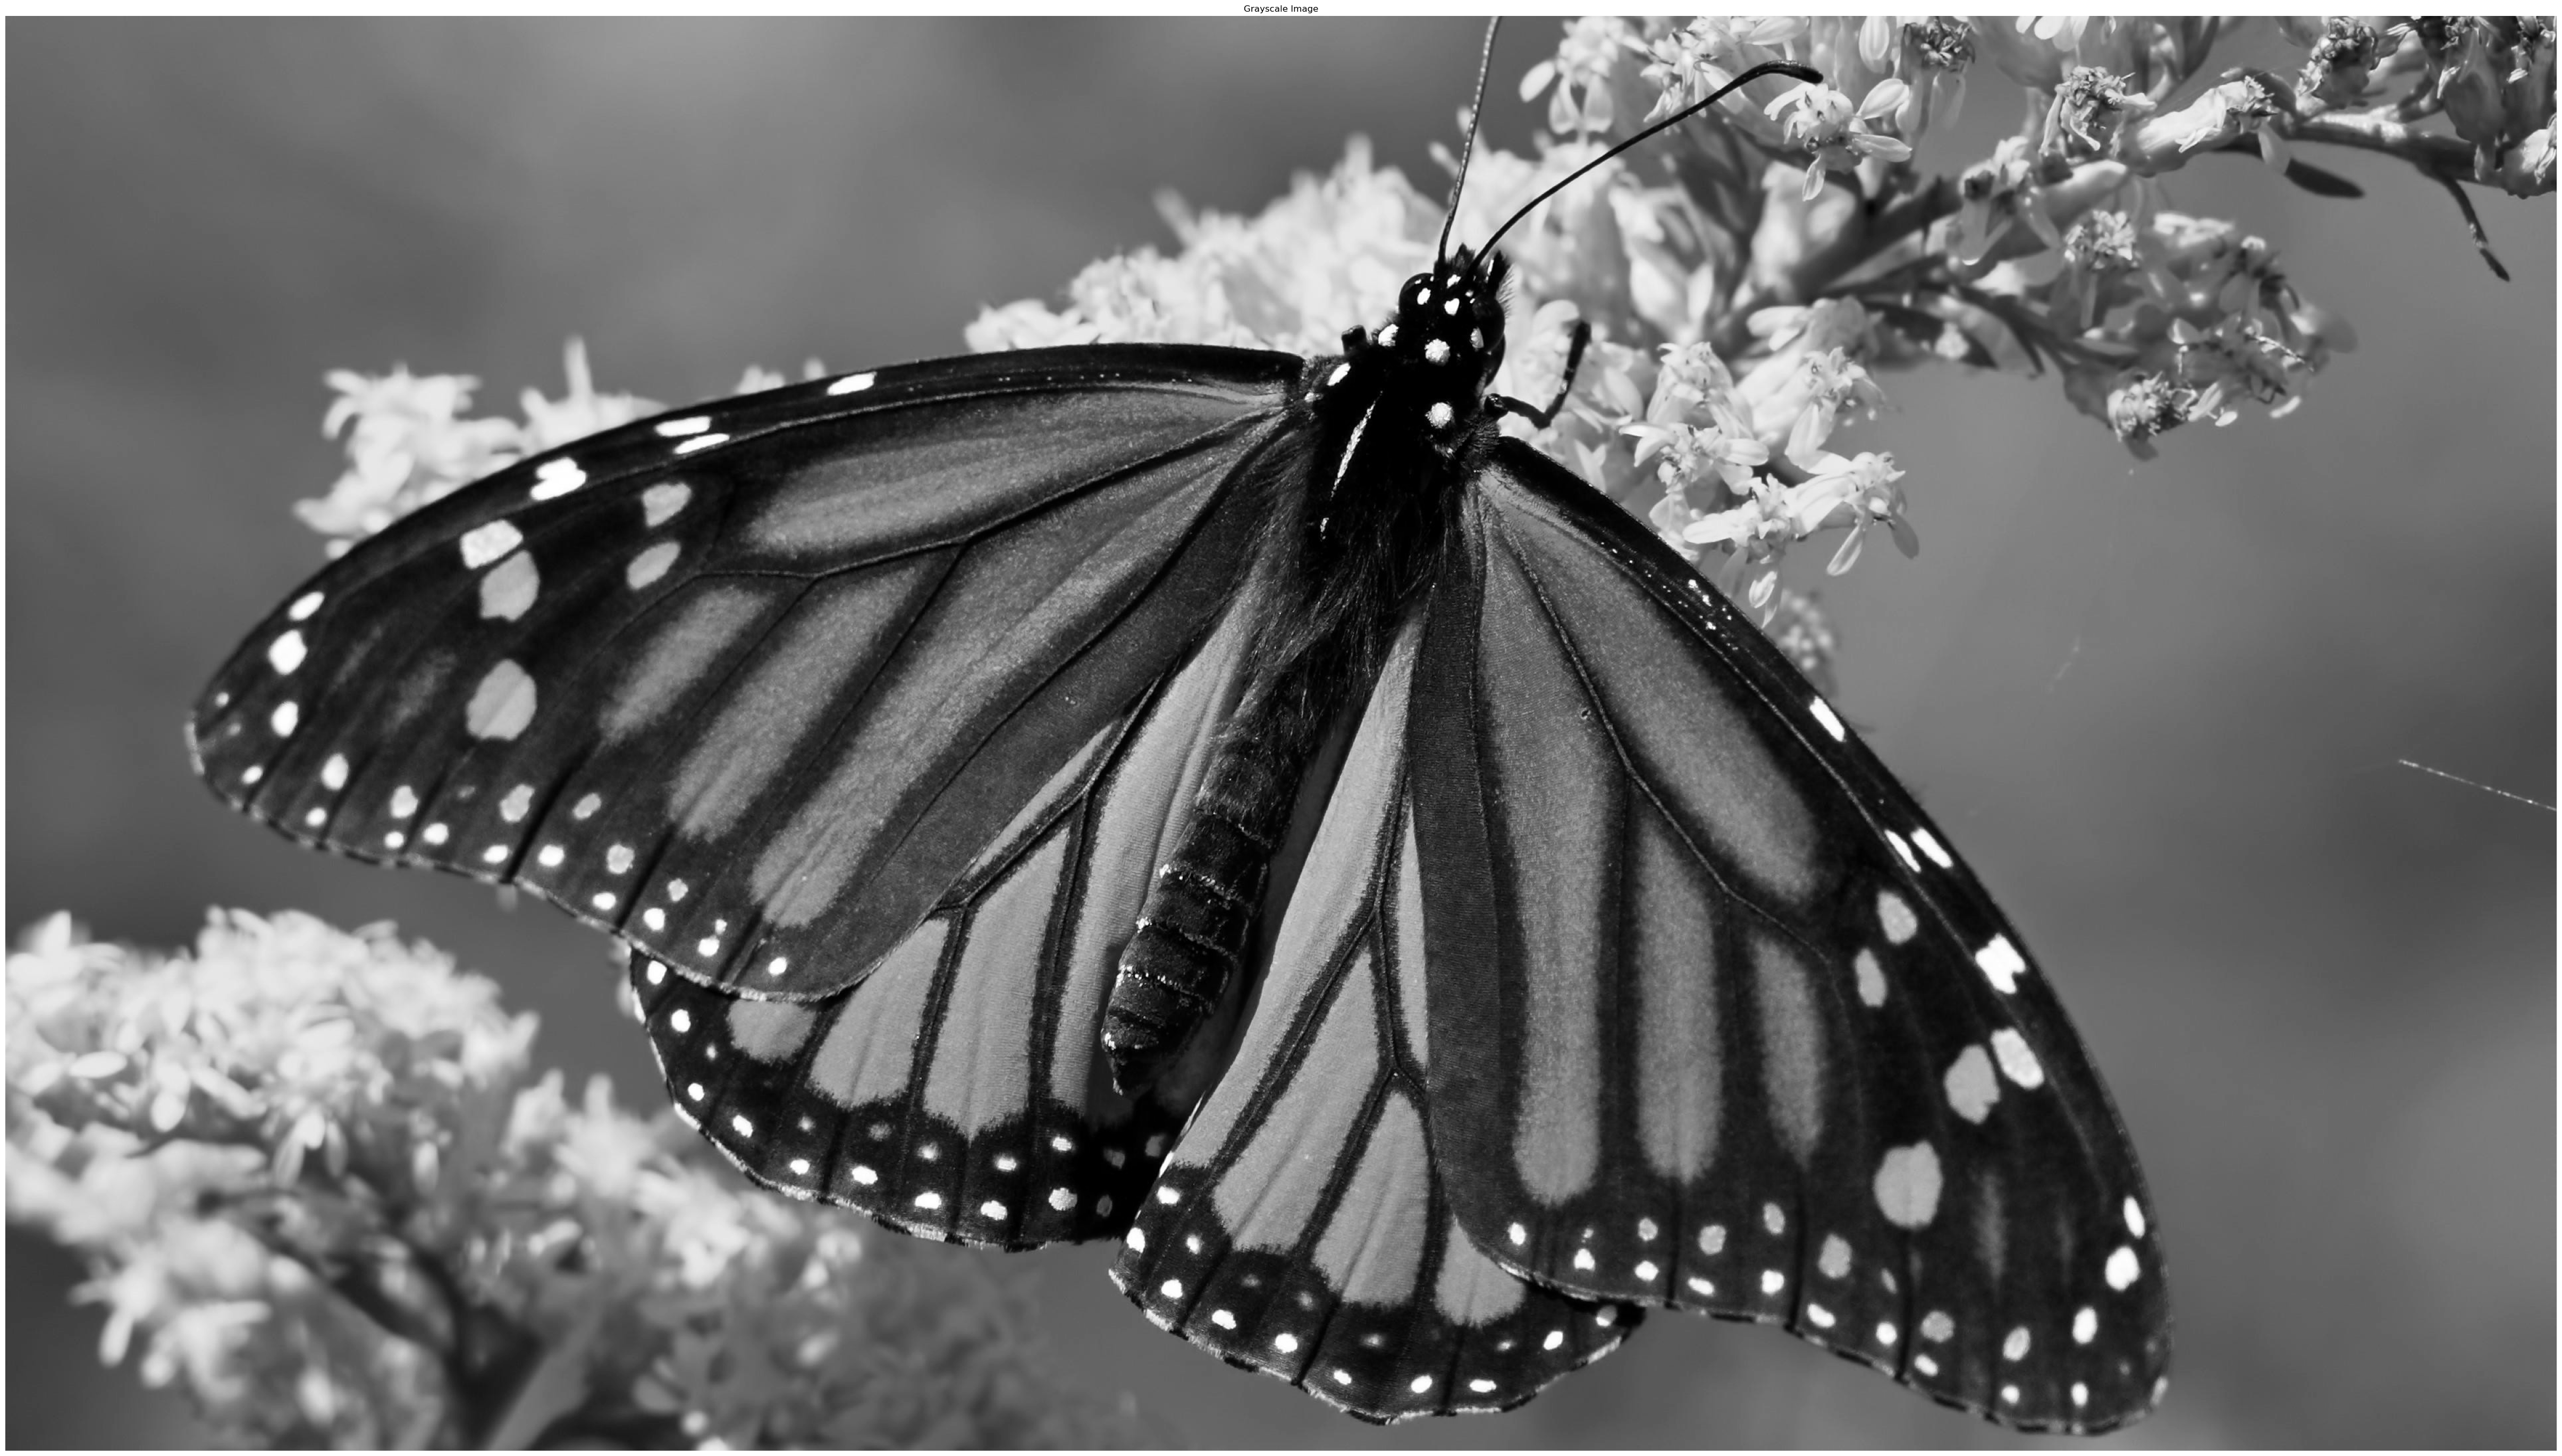

In [7]:
img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plotimage(gray, 'Grayscale Image')


In [9]:
import numpy as np

class Operator:
    def __init__(self, kernel, center=None):
        if not isinstance(kernel, np.ndarray):
            kernel = np.asarray(kernel)
        
        if kernel.ndim != 2:
            raise Exception("Operator should be a 2D array")
        
        self.kernel = kernel
        
        if center is None:
            center = ((kernel.shape[0] - 1) // 2, (kernel.shape[1] - 1) // 2)
        self.center = center
    
    def __repr__(self):
        return f"kernel:\n{self.kernel}\ncenter: {self.center}"
    
    def width(self):
        return self.kernel.shape[0]
    
    def height(self):
        return self.kernel.shape[1]
    
    def center_to_right(self):
        return self.width() - 1 - self.center[0]
    
    def center_to_bottom(self):
        return self.height() - 1 - self.center[1]
    
    def apply_operator(self, gray):
        '''
        Convolution of the operator through the image
        '''
        imwidth = gray.shape[0]
        imheight = gray.shape[1]
        result = np.zeros_like(gray, dtype='int')
        
        for i in range(self.center[0], imwidth - self.center_to_right()):
            for j in range(self.center[1], imheight - self.center_to_bottom()):
                window = gray[i - self.center[0]:i + self.center_to_right() + 1,
                              j - self.center[1]:j + self.center_to_bottom() + 1]
                result[i, j] = int(np.sum(self.kernel * window))
        
        return result

# Example usage:
# Define your kernel and create an Operator instance
kernel = np.array([[1, 1, 1],
                   [1, -8, 1],
                   [1, 1, 1]])
op = Operator(kernel)

# Assuming 'gray' is your grayscale image (numpy array)
# Apply the operator to the image
result = op.apply_operator(gray)

# Print the result or use it further as needed
print(result)


    

[[   0    0    0 ...    0    0    0]
 [   0    0    0 ...  -96 -140    0]
 [   0    0    0 ...  -99 -133    0]
 ...
 [   0    0    0 ...   -3   -3    0]
 [   0    0    0 ...    3    3    0]
 [   0    0    0 ...    0    0    0]]


In [10]:
laplace4 = Operator([
 [0, 1,0],
 [1,-4,1],
 [0, 1,0]
])
laplace8 = Operator(np.array([
 [1, 1,1],
 [1,-8,1],
 [1, 1,1]
]))
# operator1 = Operator(np.array([
# [1, -1],
# ]))


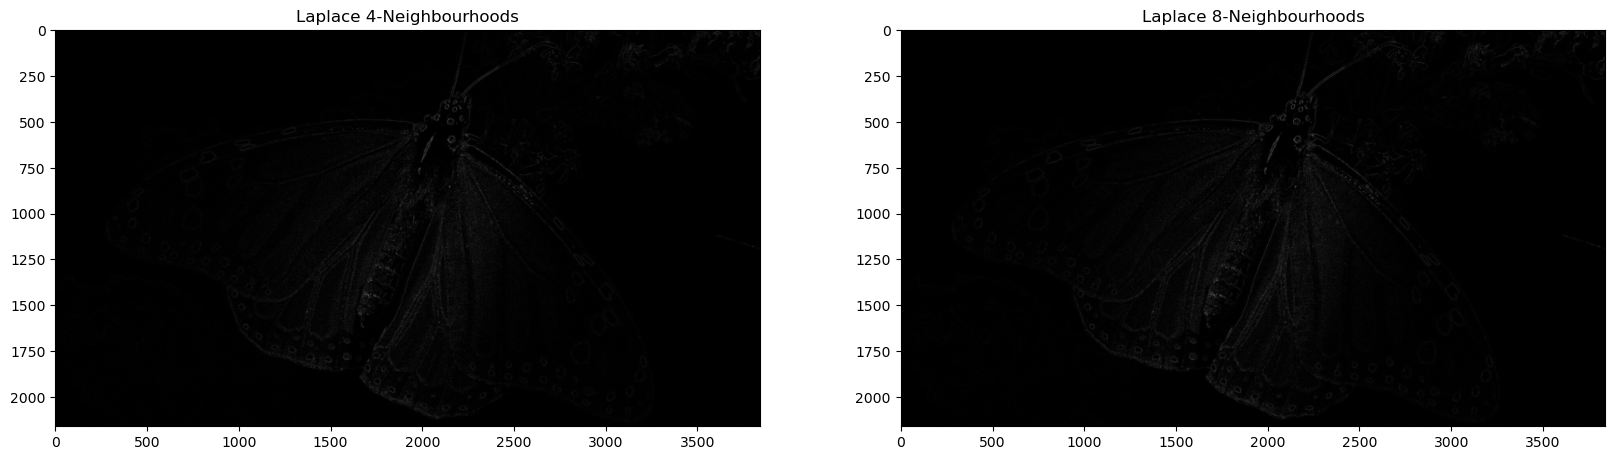

In [11]:
res4 = np.abs(laplace4.apply_operator(gray))
res8 = np.abs(laplace8.apply_operator(gray))
plt.figure(figsize=(20,20))
plt.subplot(121), plt.title("Laplace 4-Neighbourhoods"), plt.imshow(res4, cmap='gray')
plt.subplot(122), plt.title("Laplace 8-Neighbourhoods"), plt.imshow(res8, cmap='gray')
plt.show()

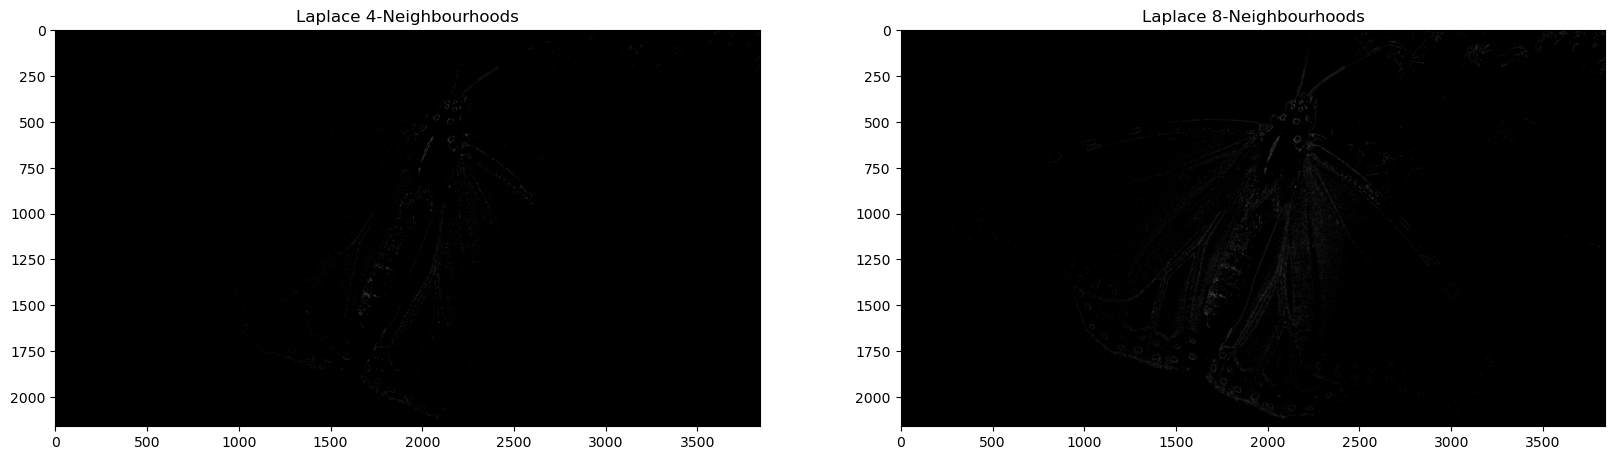

In [12]:
thresh=50
res4[res4<thresh] = 0
res8[res8<thresh] = 0
plt.figure(figsize=(20,20))
plt.subplot(121), plt.title("Laplace 4-Neighbourhoods"), plt.imshow(res4, cmap='gray')
plt.subplot(122), plt.title("Laplace 8-Neighbourhoods"), plt.imshow(res8, cmap='gray')
plt.show()